# 5.1 - Introduction to convnets

This notebook contains the code sample found in Chapter 5, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

First, let's take a practical look at a very simple convnet example. We will use our convnet to classify MNIST digits, a task that you've already been 
through in Chapter 2, using a densely-connected network (our test accuracy then was 97.8%). Even though our convnet will be very basic, its 
accuracy will still blow out of the water that of the densely-connected model from Chapter 2.

The 6 lines of code below show you what a basic convnet looks like. It's a stack of `Conv2D` and `MaxPooling2D` layers. We'll see in a 
minute what they do concretely.
Importantly, a convnet takes as input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension). 
In our case, we will configure our convnet to process inputs of size `(28, 28, 1)`, which is the format of MNIST images. We do this via 
passing the argument `input_shape=(28, 28, 1)` to our first layer.

# What are convolutions ?

##1d convolution

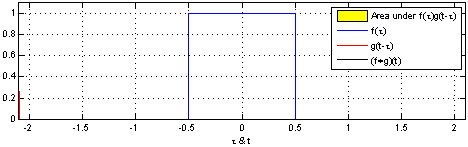

##2d convolution

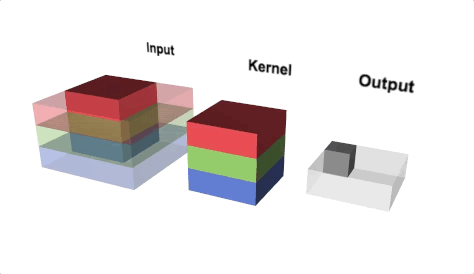

#**Convolution** as a filter

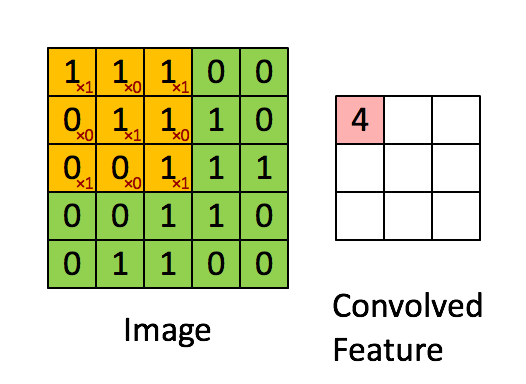

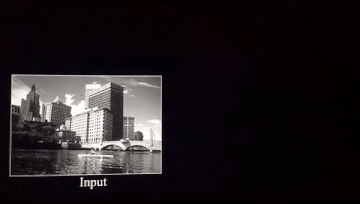

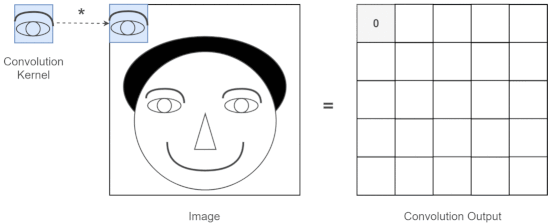

#Interactive CNN Explainer

https://poloclub.github.io/cnn-explainer/

In [179]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #SHUA-- 3 is the number of channels, MNIST only has 1 channel. Changing from 3 to 1, otherwise doesn't work.
                                                                                # Also, changing the kernels to what is in the book in order to actually achieve the 99% accuracy stated
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

Let's display the architecture of our convnet so far:

In [180]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

You can see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width 
and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to 
the `Conv2D` layers (e.g. 32 or 64).

The next step would be to feed our last output tensor (of shape `(3, 3, 10)`) into a densely-connected classifier network like those you are 
already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. 
So first, we will have to flatten our 3D outputs to 1D, and then add a few `Dense` layers on top:

In [181]:
model.add(layers.Flatten())

model.add(layers.Dense(10, activation='softmax'))

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [182]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

As you can see, our `(3, 3, 10)` outputs were flattened into vectors of shape `(90,)`, before going through two `Dense` layers.

Now, let's train our convnet on the MNIST digits. We will reuse a lot of the code we have already covered in the MNIST example from Chapter 
2.

In [183]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [184]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 9s 9ms/step - loss: 0.2585 - accuracy: 0.9209
Epoch 2/5
938/938 [==============================] - 10s 10ms/step - loss: 0.0822 - accuracy: 0.9751
Epoch 3/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0573 - accuracy: 0.9823
Epoch 4/5
938/938 [==============================] - 11s 11ms/step - loss: 0.0441 - accuracy: 0.9866
Epoch 5/5
938/938 [==============================] - 12s 12ms/step - loss: 0.0353 - accuracy: 0.9888


Let's evaluate the model on the test data:

In [185]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9861


In [186]:
test_acc

0.9861000180244446

While our densely-connected network from Lesson 3 had a test accuracy of 97.8%, our basic convnet has a test accuracy of 99.3%: we 
decreased our error rate by 68% (relative). Not bad! 

If you want to save and load your trained model later

In [ ]:
#save your model

from google.colab import drive
drive.mount('/gdrive')

model.save('/gdrive/MyDrive/DL_5783/Notebooks/Models/myfirstcnn')

#load your model later

model = keras.models.load_model('/gdrive/MyDrive/DL_5783/Notebooks/Models/myfirstcnn')

#Homework: run the CNN model on MNISt for yourself and compare to the MLP run from last homework (Lesson 2)

#### Shua-- I will do this in Pytorch

In [3]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim

In [4]:
#load mnist
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [116]:
class PrintLayer(nn.Module):
    def __init__(self):
        super(PrintLayer, self).__init__()
    
    def forward(self, x):
        print(x.shape)
        return x

In [175]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        model = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride = 1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.5),
            nn.Conv2d(32, 64, 3, 1,1),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Conv2d(64, 64, 3, 1,1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.5),
            nn.Conv2d(64, 128, 3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.5),
            
            #add another layer
            nn.Flatten(),
            nn.Linear(512, 10),
        )
        self.model = model
    
    def forward(self, x):
        return self.model(x)

In [176]:
def train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=10):

    for epoch in range(num_epochs):
        model.train()
        train_losses = 0.0
        train_accuracy = 0.0
        for inputs, labels in dataloaders['train']:
            inputs= inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                loss.backward() #backpropogation
                optimizer.step()

            accuracy = torch.sum(preds==labels)
            # train_losses+=loss
            train_accuracy+=accuracy
            train_losses+=loss.item()
        # scheduler.step()        
        loss = train_losses / len(dataloaders['train'])
        accuracy = train_accuracy / len(dataloaders['train'].dataset)
        # print(loss)
        print('epoch: ', epoch)
        print('train_accuracy: ', accuracy)
        print('train_loss: ', loss)
        model.eval()
        evaluation_loss = 0.0
        evaluation_accuracy = 0.0
        for inputs, labels in dataloaders['val']:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs,1)
            loss = criterion(outputs, labels)

            accuracy = torch.sum(preds==labels)
            evaluation_accuracy+=accuracy
            evaluation_loss+=loss
        
        loss = evaluation_loss / len(dataloaders['val'])
        accuracy = evaluation_accuracy / len(dataloaders['val'].dataset)

        print('eval_accuracy: ', accuracy)
        print('eval_loss: ', loss)

In [177]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Model().to(device)
# torch._dynamo.reset()
torch._dynamo.config.suppress_errors = True
model = torch.compile(model, mode="reduce-overhead") #first time this takes longer, faster afterwards.
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
dataloaders = {'train': trainloader, 'val': testloader}
train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=5)

[2023-03-31 14:57:16,625] torch._inductor.utils: [WARNING] using triton random, expect difference from eager
[2023-03-31 14:58:18,970] torch._inductor.utils: [WARNING] using triton random, expect difference from eager


epoch:  0
train_accuracy:  tensor(0.8713)
train_loss:  0.38983881645508284
eval_accuracy:  tensor(0.9807)
eval_loss:  tensor(0.0642, grad_fn=<DivBackward0>)
epoch:  1
train_accuracy:  tensor(0.9477)
train_loss:  0.17287692680025596
eval_accuracy:  tensor(0.9867)
eval_loss:  tensor(0.0455, grad_fn=<DivBackward0>)
epoch:  2
train_accuracy:  tensor(0.9534)
train_loss:  0.15507062431822008
eval_accuracy:  tensor(0.9847)
eval_loss:  tensor(0.0508, grad_fn=<DivBackward0>)
epoch:  3
train_accuracy:  tensor(0.9542)
train_loss:  0.14849515241989766
eval_accuracy:  tensor(0.9863)
eval_loss:  tensor(0.0409, grad_fn=<DivBackward0>)
epoch:  4
train_accuracy:  tensor(0.9567)
train_loss:  0.14387012387899908
eval_accuracy:  tensor(0.9880)
eval_loss:  tensor(0.0412, grad_fn=<DivBackward0>)


In [178]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Model().to(device)
# torch._dynamo.reset()
torch._dynamo.config.suppress_errors = True
model = torch.compile(model, mode="reduce-overhead") #first time this takes longer, faster afterwards.
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0003)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
dataloaders = {'train': trainloader, 'val': testloader}
train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=10)

[2023-03-31 15:03:31,011] torch._inductor.utils: [WARNING] using triton random, expect difference from eager
[2023-03-31 15:04:49,173] torch._inductor.utils: [WARNING] using triton random, expect difference from eager


epoch:  0
train_accuracy:  tensor(0.7326)
train_loss:  0.776598727827006
eval_accuracy:  tensor(0.9626)
eval_loss:  tensor(0.1182, grad_fn=<DivBackward0>)
epoch:  1
train_accuracy:  tensor(0.9383)
train_loss:  0.19922065997182498
eval_accuracy:  tensor(0.9769)
eval_loss:  tensor(0.0715, grad_fn=<DivBackward0>)
epoch:  2
train_accuracy:  tensor(0.9545)
train_loss:  0.1476532543060193
eval_accuracy:  tensor(0.9840)
eval_loss:  tensor(0.0515, grad_fn=<DivBackward0>)
epoch:  3
train_accuracy:  tensor(0.9625)
train_loss:  0.12004209043823484
eval_accuracy:  tensor(0.9874)
eval_loss:  tensor(0.0408, grad_fn=<DivBackward0>)
epoch:  4
train_accuracy:  tensor(0.9671)
train_loss:  0.1061217173147621
eval_accuracy:  tensor(0.9879)
eval_loss:  tensor(0.0395, grad_fn=<DivBackward0>)
epoch:  5
train_accuracy:  tensor(0.9710)
train_loss:  0.0934271214178392
eval_accuracy:  tensor(0.9884)
eval_loss:  tensor(0.0358, grad_fn=<DivBackward0>)
epoch:  6
train_accuracy:  tensor(0.9725)
train_loss:  0.087223

Got to %99 accuracy!

Steps taken:
1) Added another layer, expanding from 64 kernels to 128 kernels.
2) Added Maxpooling after the first layer, and maxpooling after the 2nd 64 kernel layer (3rd hidden layer)
3) Added Dropout (0.5)
4) Lowered the learning rate, and used Adam as an optimizer with a learning rate scheduler.